In [1]:
import math
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# Disa funksione ndihmëse
def plot_colored_distribution(mu, sigma, color_start=None, color_end=None, two_tailed=True):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
    fig = plt.figure()
    ax = fig.add_subplot()
    if color_start:
        if not color_end:
            color_end = mu+3*sigma if color_start>=mu else mu-3*sigma
        ptx = np.linspace(color_start, color_end, 100)
        pty = st.norm.pdf(ptx,mu,sigma)
        plt.fill_between(ptx, pty, color='red', alpha=1)
        
    if two_tailed:
        ptx = np.linspace(2*mu - color_start, 2*mu - color_end, 100)
        pty = st.norm.pdf(ptx,mu,sigma)
        plt.fill_between(ptx, pty, color='red', alpha=1)
    plt.xlim(mu - 3*sigma, mu + 3*sigma)
    plt.ylim(0, st.norm.pdf(x, mu, sigma).max()+(st.norm.pdf(x, mu, sigma).max())/100)
    ax.plot(x, st.norm.pdf(x, mu, sigma))
    plt.show()


# Logjika pas testimit të hipotezave

Ta zëmë që një kompani e qumështit ka një makinë që duhet të mbush paketimet me 800 mL qumësht. Por, menaxheri i kompanisë po dyshon se makina është prishur dhe po i mbush paketimet me tjetër sasi qumështi. Detyra juaj si analist i të dhënave është të vërtetoni se nëse makina po mbush saktë apo jo.

Që t'i përgjigjemi me statistikë këtij problemi, së pari duhet të ndrërtojmë hipotezat statistikore. Hipoteza e menaxherit është që makina nuk po mbush vlerën prej 800 mL. Prandaj, hipotezat tona statistikore duhet të jenë:

$H_{0}: \mu=800mL$
<br>
$H_{A}: \mu\neq800mL$

Tutje, ju merrni një mostër prej 40 paketimeve dhe ju del se mesatarja e mbushjes së paketimit është 810mL. Ndërsa, ju e dini se devijimi standard i makinës (e dini këtë sigurt pasi që kjo matet vazhdimisht) është 18mL. Pra:

$n = 40$
<br>
$\bar{x}=810mL$
<br>
$\sigma=18mL$

Pyetja që ju duhet t'i shtroni vetës është: Nëse makina me të vërtetë mbush 800mL, sa janë gjasat që në një mostër prej 40 rasteve të marrim mesatare prej 810mL?

Pra, vlera që neve na duhet është: $ P(\bar{x}=810 | \mu=800) $. Tërë logjika e testimit të hipotezave është të gjendet kjo vlerë (vlera që mostra të na jep vlerën që ka dhënë duke supozuar që hipoteza nulle është e vërtetë).

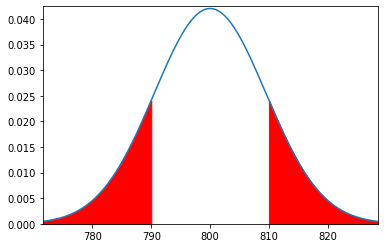

In [3]:
plot_colored_distribution(800, 60/math.sqrt(40), 810) # vleren 60 nuk ka ndonje kuptim :)

Për llogaritjen e kësaj gjase na duhet ta dijmë devijimin standard të shpërndarjes së mostrës së saj. Ky devijim standard në statstikë quhet gabim standard (standard error) dhe për testim tëhipotezave me mesatare të popullacionit kur dihet devijimi standard i tij llogaritet me këtë formulë:

$SE = \frac{\sigma}{\sqrt{n}}$

Për rastin tonë, gabimi standard andaj duhet të jetë:

In [4]:
madhesia_mostres = 40
mesatarja = 810
devijimi_standard = 18

gabimi_standard = devijimi_standard/math.sqrt(madhesia_mostres)
print(f"Gabimi standard është: {gabimi_standard: .4f}")

Gabimi standard është:  2.8460


Tani na duhet të gjejmë se sa gabime standarde jemi prej mesatarës së hipotezës nulle. Për ta bërë këtë bëjmë kalkulimin si në vijim: $\frac{\bar{x} - \mu}{SE}$

In [5]:
largesia_nga_mesatarja = (mesatarja-800)/gabimi_standard
print(f"810 është {largesia_nga_mesatarja: .2f} gabime standarde nga mesatarja nën hipotezën 0 (800mL).")

810 është  3.51 gabime standarde nga mesatarja nën hipotezën 0 (800mL).


Tani, e gjitha çka ka mbetur të bëjmë është të gjejmë gjasat që një mostër të jetë 3.51 ose më shumë devijime standarde nga 800mL. Këtë më së lehti e gjejmë me anë të Python si në vijim:

In [6]:
p_value = 2 * (1 - st.norm.cdf(largesia_nga_mesatarja)) # *2 sepse ne jemi duke testuar për dy anët e shpërndarjes
print(f"Gjasat që të jemi 3.51 devijime standarde nga mesatarja janë: {p_value: .10f}")

Gjasat që të jemi 3.51 devijime standarde nga mesatarja janë:  0.0004420083


# Testi me një anë dhe me dy anë

Në shembullin paraprak na u shtrua hipoteza që mesatarja e popullacionit të jetë e ndryshme nga 800. Çka nëse pyetja e menaxherit të kompanisë do të ishte se a mbush makina më shumë sesa që duhet?

Atëherë, ne do të duhej të testonim vetëm për vlera më të mëdha sesa 800. Hipotezat tona do të ishin:

$H_{0}: \mu <= 800$
<br>
$H_{A}: \mu > 800$

Testimi tani do të bëhej vetem në për kahun në të djathtë të mesatarës:

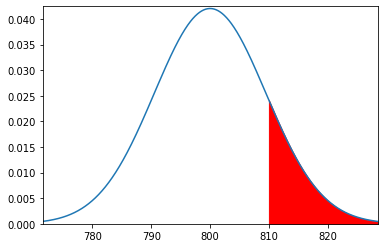

In [7]:
plot_colored_distribution(800, 60/math.sqrt(40), 810, two_tailed=False)

Ndërsa gjasat do të llogariteshin:

In [8]:
p_value =  (1 - st.norm.cdf(largesia_nga_mesatarja)) 
print(f"Gjasat që të jemi 3.51 devijime standarde më e madhe sesa mesatarja janë: {p_value: .10f}")

Gjasat që të jemi 3.51 devijime standarde më e madhe sesa mesatarja janë:  0.0002210042


# Niveli i signifikancës dhe nxjerrja e konkluzioneve

E pamë që gjasat që të marrim nga mostra mesatare prej 810mL nëse mesatarja e popullacionit është 800mL janë 0.044%. __Kjo gjasë në statistikë quhet vlera p!__

Logjikisht, mund të shihet që gjasat që të marrim mesatare të tillë janë të vogla. Poashtu, meqë mostra ka shpërndarje propabilistike, vlera p kurrë nuk mund të jetë 0. Prandaj, në statistikë mundohemi të definojmë se çka është gabim i pranueshëm e çka jo.

Zakonisht në statistikë lejojmë një nivel të gabimit. __Ky nivel që e lejojmë quhet nivel i signifikancës.__ Zakonisht në statistikë niveli i signifikancës vendoset në 5% (0.05), por ka raste kur kërkohet 1% (0.01) apo lejohet edhe 10% (0.1).

*Në rastin tonë, vlera p është 0.00044 (më e vogël sesa 0.05), prandaj mund të themi se me nivel të signifikancës prej 0.05 mund të refuzojmë hipotezën nulle që mesatarja e popullacionit është 800mL.*

# Kur devijimi standard i popullacionit nuk dihet

Në shembullin e mëhershëm supozuam që e dijmë devijimin standard të popullacionit. Në praktikë sidoqoftë shpesh nuk e dijmë këtë vlerë. Prandaj, në vend të shpërndarjes normale, marrim shpërndarjen t që merr parasysh edhe gjasat që me anë të mostrës të gabojmë edhe matjen e devijimit standard ($\sigma$).

Shembull:

Një kompani në ueb po planifikon ta përmirësoj dizajnin e faqës. Deri tani, vizitorët mesatarisht në faqe kanë qëndruar 8 minuta. Ata tani po shpresojnë që me faqën e re të rrisin kohëne  qëndrimit në faqe. Për të testuar, kanë marrë një mostër prej 30 presonave dhe u kanë shfaqur pamjen e re. Pas vendosjes së pamjes së re, vizitorët kanë qëndruar në faqe 9 minuta, me devijim standard prej 3 minutave. A e ka rritur pamja e re kohën e qëndrimit në faqe?

Hipotezat tona janë:

$H_{0}: \mu <=8 $
<br>
$H_{A}: \mu >8 $

Poashtu, dijmë: 

$n = 30$
<br>
$\bar{x} = 9$
<br>
$s = 2$

Tani, statistikën testuese e ndërtojmë me anë të:

$$t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

Kjo ka shpërndarjen propabilistike t me shkallë lirie: $df = n-1 = 30-1 = 29$.

In [9]:
n = 30
x_bar = 9
s = 3

t = (x_bar - 8)/(s/math.sqrt(n))

print(f"Vlera e t është: {t}")

# Gjejmë vlerën p
p_value = 1 - st.t.cdf(t, n-1)
print(f"Vlera p është: {p_value: .5f}")

Vlera e t është: 1.8257418583505538
Vlera p është:  0.03910


Meqë vlera e p është më e vogël sesa niveli i signifikancës prej 0.05, mund të themi se mund ta refuzojmë hipotezën nulle.

# Dallimi në mesatarën e grupeve

Shpesh na duhet të gjejmë dallimin në mesataret e dy grupeve. Në ato raste, statistika jonë testuese ndërtohet si në vijim:

$$ t = \frac{(\bar{x}_{1}-\bar{x}_{2}) - (\mu_{1} - \mu_{2})}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}} $$

Ndërsa, statistika ka shpërndarje t me shkallë lirie si në vijim:

$$ df = \frac{(\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}})^2}{[(\frac{1}{n_{1}}-1)(\frac{s_{1}^{2}}{n_{1}})^{2} + (\frac{1}{n_{2}}-1)(\frac{s_{2}^{2}}{n_{2}})^{2}]} $$

In [10]:
# Kalkulimi:

def kalkulo_t(x_bar1, x_bar2, mu1, mu2, s1, s2, n1, n2):
    numeruesi = (x_bar1 - x_bar2) - (mu1-mu2)
    emeruesi = math.sqrt((s1**2/n1)+(s2**2/n2))
    return numeruesi/emeruesi

def kalkulo_df(x_bar1, x_bar2, mu1, mu2, s1, s2, n1, n):
    numeruesi = ((s1**2/n1) + (s2**2/n2))**2
    emeruesi_1 = ((1/n1)-1) * ((s1**2/n1)**2)
    emeruesi_2 = ((1/n2)-1) * ((s2**2/n2)**2)
    return numeruesi/(emeruesi_1 + emeruesi_2)

Shembull:


Kompania e farmaceutikës po prodhon barin A. Për ta testuar kanë marr një mostër prej 20 personave dhe u kanë dhënë këtë bar, ndërsa njëmostre tjetër prej 20 personave u kanë dhënë një placebo. Rezultatet kanë qenë si në vijim. Simptomat e sëmundjes kanë kaluar pas 5 orëve për pacientët me barin A, me devijim standard prej 1 ore. Ndërsa për pacientët me placebo, simptomat kanë kaluar pas 5.5 orëve me devijim standard 2 orë. Vërtetoni se bari funksionon më mirë sesa placebo.

# Implementimi në Python

Libraria scipy.stats ofron shumë teste statisikore që mund të kalkulohen lehtësisht.

Për rastin me qumësht, ne do të kishim marr një array me rezultatet e mostres x dhe thjesht do të mund ta bënim testimin me anë të: __scipy.stats.ttest_1samp(x, popmean=8)__.

Ndërsa për rastin e dytë: __scipy.stats.ttest_ind(x1, x2, equal_var = False, alternative="greater")__.